In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

In [2]:
# The three series dataset were collect from Trading View platform in the CSV format

In [3]:
dol = pd.read_csv('DOL1.csv').rename(columns={'time':'Date'}) # Read the file and rename column time to Date
dol = dol.drop(['open','high','low','Volume','Volume MA'],axis=1).set_index('Date') # Set the Date as index
dol.index = pd.to_datetime(dol.index).tz_localize(tz=None).strftime("%Y-%m-%d") # Convert the Date to %Y/%m/%d format
dol.index = pd.to_datetime(dol.index, infer_datetime_format=True, format = "%Y/%m/%d")
dol

,close
Date,
2019-07-02,3855.238
2019-07-03,3841.125
2019-07-04,3801.164
2019-07-05,3825.461
2019-07-08,3812.346
...,...
2022-03-08,5102.002
2022-03-09,5038.628
2022-03-10,5048.185


In [4]:
dol.describe() # Descriptive Analysis

,close
count,670.000000
mean,5056.672015
std,591.849039
min,3733.444000
25%,4593.123500
50%,5264.152500
75%,5480.311250
max,5933.852000


In [5]:
ind = pd.read_csv('IND1.csv').rename(columns={'time':'Date'}) # Read the file and rename column time to Date
ind = ind.drop(['open','high','low','Volume','Volume MA'],axis=1).set_index('Date') # Set the Date as index
ind.index = pd.to_datetime(ind.index).tz_localize(tz=None).strftime("%Y-%m-%d") # Convert the Date to %Y/%m/%d format
ind.index = pd.to_datetime(ind.index, infer_datetime_format=True, format = "%Y/%m/%d")
ind

,close
Date,
2019-07-02,101242
2019-07-03,102711
2019-07-04,104303
2019-07-05,104658
2019-07-08,105137
...,...
2022-03-08,112219
2022-03-09,114889
2022-03-10,114495


In [6]:
ind.describe() # Descriptive Analysis

,close
count,670.000000
mean,107758.653731
std,12609.003115
min,63099.000000
25%,101946.250000
50%,108290.500000
75%,116590.250000
max,130814.000000


In [7]:
di1 = pd.read_csv('DI1.csv').rename(columns={'time':'Date'}) # Read the file and rename column time to Date
di1 = di1.drop(['open','high','low','Volume','Volume MA'],axis=1).set_index('Date') # Set the Date as index
di1.index = pd.to_datetime(di1.index).tz_localize(tz=None).strftime("%Y-%m-%d") # Convert the Date to %Y/%m/%d format
di1.index = pd.to_datetime(di1.index, infer_datetime_format=True, format = "%Y/%m/%d")
di1

,close
Date,
2019-07-02,6.405
2019-07-03,6.404
2019-07-04,6.400
2019-07-05,6.400
2019-07-08,6.405
...,...
2022-03-08,11.360
2022-03-09,11.360
2022-03-10,11.408


In [8]:
di1.describe() # Descriptive Analysis

,close
count,670.000000
mean,4.467991
std,2.438765
min,1.888000
25%,2.154000
50%,4.151000
75%,5.703000
max,11.530000


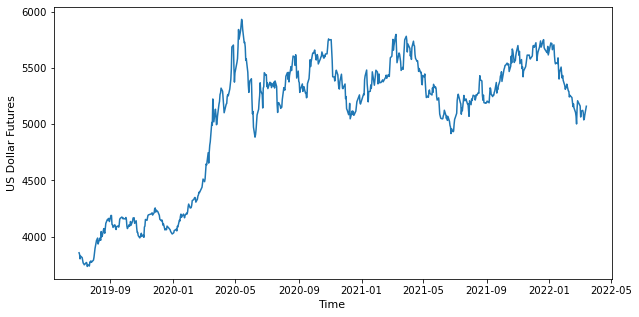

In [9]:
from grafico import graph, histogram
graph(dol,"US Dollar Futures")

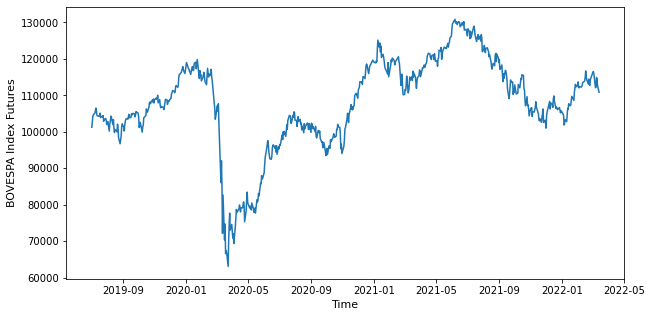

In [10]:
graph(ind,"BOVESPA Index Futures")

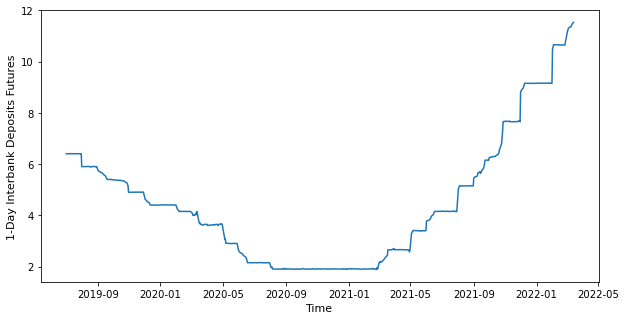

In [11]:
graph(di1,"1-Day Interbank Deposits Futures")

In [12]:
from general import returns # Calculate returns for each series 
dol = returns(dol)
ind = returns(ind)
di1 = returns(di1)

In [13]:
print('DOL Returns',dol.describe())
print('IND Returns',ind.describe())
print('DI1 Returns',di1.describe())

DOL Returns             close
count  669.000000
mean     0.000436
std      0.010667
min     -0.034717
25%     -0.006139
50%      0.001172
75%      0.006866
max      0.045662
IND Returns             close
count  669.000000
mean     0.000135
std      0.020567
min     -0.162461
25%     -0.008421
50%      0.001189
75%      0.010052
max      0.136565
DI1 Returns             close
count  669.000000
mean     0.000879
std      0.019531
min     -0.139735
25%     -0.001137
50%      0.000000
75%      0.001553
max      0.221179


In [14]:
# Stationarity test for returns
from stationarity import dickey_fuller, kpss_test
dol_estac = dol.iloc[:,0].values
ind_estac = ind.iloc[:,0].values
di1_estac = di1.iloc[:,0].values

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [15]:
dickey_fuller(dol_estac,'US Dollar Futures Returns')
kpss_test(dol_estac,'US Dollar Futures Returns')

US Dollar Futures Returns
Estatística ADF: -25.344840
p-valor: 0.000000
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


US Dollar Futures Returns
Estatística KPSS: 0.242650
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária




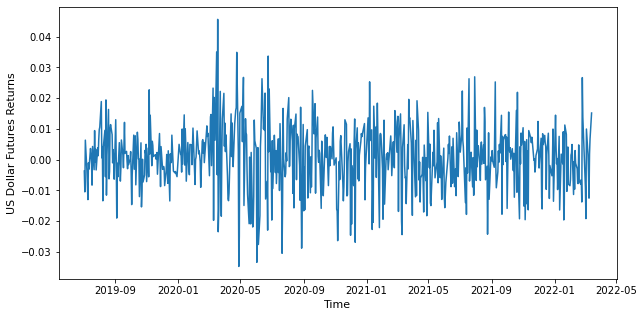

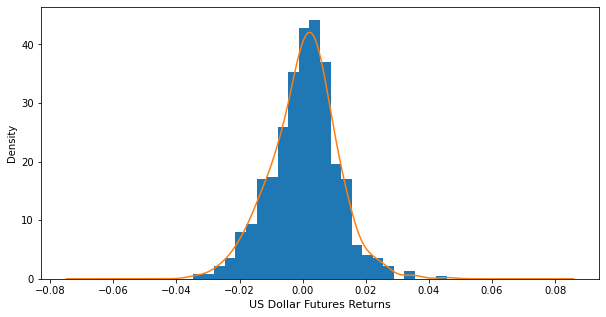

In [16]:
# We don't have enough evidence to deny stationarity for DOL Returns
graph(dol,"US Dollar Futures Returns")
histogram(dol['close'],"US Dollar Futures Returns",bins=24) 

In [17]:
# Normality test for returns
from general import shapiro_test
shapiro_test(dol['close'])

Statistics=0.99085021, p=0.00036469
Reject H0 - Data are not normally distributed


In [18]:
# No evidence to support normality distribution for DOL Returns

In [19]:
dickey_fuller(ind_estac,'IBOVESPA FUTURES RETURNS')
kpss_test(ind_estac,'IBOVESPA FUTURES RETURNS')

IBOVESPA FUTURES RETURNS
Estatística ADF: -8.171487
p-valor: 0.000000
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


IBOVESPA FUTURES RETURNS
Estatística KPSS: 0.048054
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária




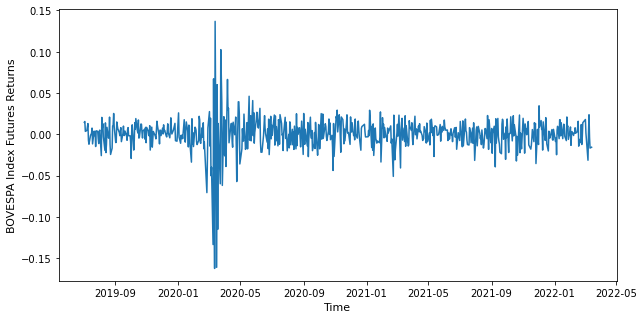

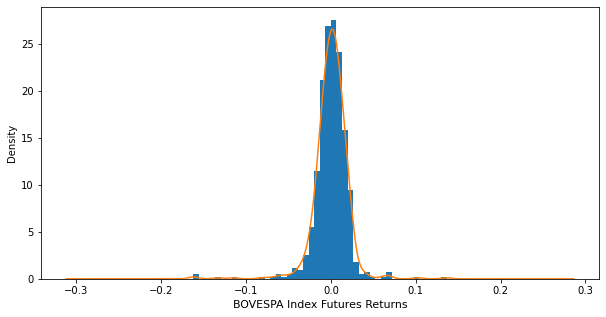

In [20]:
# We don't have enough evidence to deny stationarity for IND Returns
graph(ind,"BOVESPA Index Futures Returns")
histogram(ind['close'],"BOVESPA Index Futures Returns",bins=46)

In [21]:
# Normality test for returns
shapiro_test(ind['close'])

Statistics=0.80454046, p=0.00000000
Reject H0 - Data are not normally distributed


In [22]:
# No evidence to support normality distribution for IND Returns

In [23]:
dickey_fuller(di1_estac,'1-Day Interbank Deposits Futures Returns')
kpss_test(di1_estac,'1-Day Interbank Deposits Futures Returns')

1-Day Interbank Deposits Futures Returns
Estatística ADF: -12.441490
p-valor: 0.000000
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


1-Day Interbank Deposits Futures Returns
Estatística KPSS: 1.778045
p-valor: 0.010000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A sérienão é estacionária




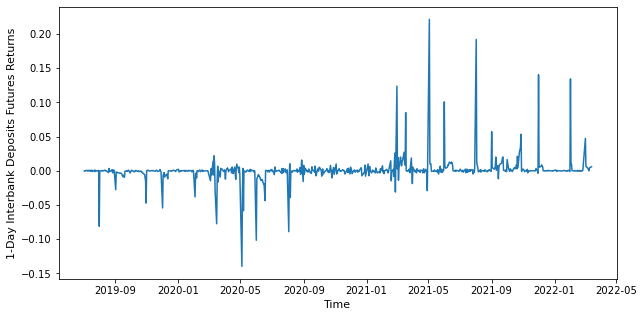

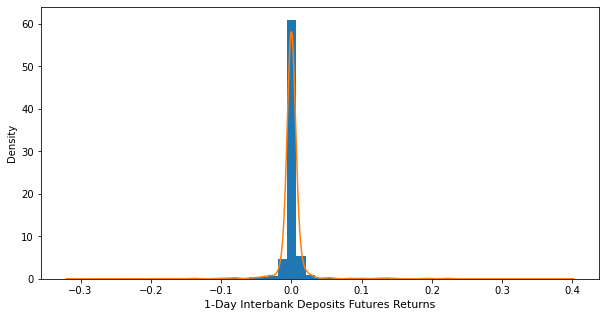

In [24]:
graph(di1,"1-Day Interbank Deposits Futures Returns")
histogram(di1['close'],"1-Day Interbank Deposits Futures Returns",bins=27)

In [25]:
# Take the returns' first difference for DI1, as their returns alone didn't ensure stationarity in the data
di1['close'] = di1['close'].diff()
di1 = di1.dropna()
di1_estac = di1.iloc[:,0].values
di1

,close
Date,
2019-07-04,-0.000469
2019-07-05,0.000625
2019-07-08,0.000781
2019-07-10,-0.001562
2019-07-11,0.001093
...,...
2022-03-08,-0.001770
2022-03-09,-0.001586
2022-03-10,0.004216


In [26]:
dickey_fuller(di1_estac,'1-Day Interbank Deposits Futures Returns')
kpss_test(di1_estac,'1-Day Interbank Deposits Futures Returns')

1-Day Interbank Deposits Futures Returns
Estatística ADF: -10.979646
p-valor: 0.000000
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


1-Day Interbank Deposits Futures Returns
Estatística KPSS: 0.017019
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária




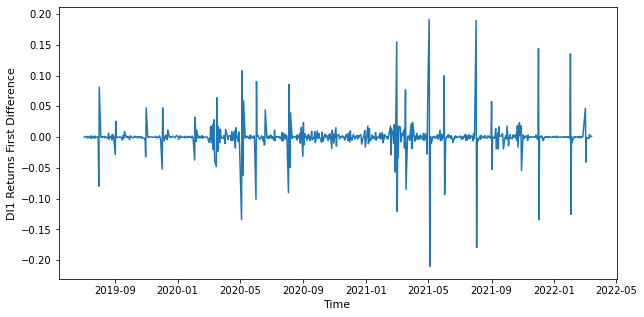

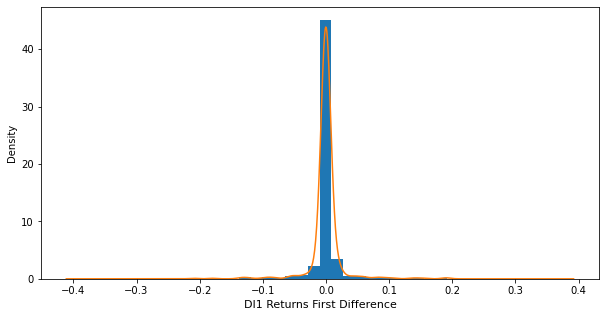

In [27]:
# Now we don't have enough evidence to deny stationarity for DI1 Returns First Difference
graph(di1,"DI1 Returns First Difference")
histogram(di1['close'],"DI1 Returns First Difference",bins=22)

In [28]:
# Normality test for returns' first difference
shapiro_test(di1['close'])

Statistics=0.49489850, p=0.00000000
Reject H0 - Data are not normally distributed


In [29]:
# No evidence to support normality distribution for DI1 Returns First Difference

# GARCH

In [30]:
from arch import arch_model # Preparing the data for all three assets GARCH (and E-GARCH) modelling.
dol_garch = dol*100
ind_garch = ind*100
di1_garch = di1*100

DOL GARCH

In [31]:
garch = arch_model(dol_garch, p=1,q=1, vol='GARCH', mean='Constant')
resultado_dol = garch.fit(disp='off')
resultado_dol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -957.233
Distribution:                  Normal   AIC:                           1922.47
Method:            Maximum Likelihood   BIC:                           1940.49
                                        No. Observations:                  669
Date:                Mon, May 16 2022   Df Residuals:                      668
Time:                        13:45:31   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0282  3.738e-02      0.755      0.450 [-4.504e-02,  0.101]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0303  3.391e-02      0.894      0.372 [-3.616e-02,9.677e-02]
alpha[1]       0.0846  5.397e-02      1.567      0.117   [-2.121e-02,  0.190]
beta[1]        0.8908  7.931e-02     11.231  2.861e-29      [  0.735,  1.046]
=============================================================================

Covariance estimator: robust
"""

In [32]:
lags = log(len(resultado_dol.std_resid))
lags
# According to Tsay(2005)

6.505784060128229

In [33]:
# Normality and Ljung-box test for standardized residuals on lags 6 and 7 (Test for auto-correlation)
from general import shapiro_test, LjungBox

shapiro_test(resultado_dol.std_resid)
LjungBox(resultado_dol.std_resid)

resultado_ljungbox = LjungBox(resultado_dol.std_resid).reset_index().rename(columns={'index': 'lags'})
resultado_ljungbox['lags'] = resultado_ljungbox['lags'] + 1
resultado_ljungbox = resultado_ljungbox.set_index('lags')
resultado_ljungbox_lag6 = resultado_ljungbox.iloc[[5]]
resultado_ljungbox_lag7 = resultado_ljungbox.iloc[[6]]
print(resultado_ljungbox_lag6)
print(resultado_ljungbox_lag7)

Statistics=0.99420953, p=0.01177925
Reject H0 - Data are not normally distributed
       lb_stat  lb_pvalue
lags                     
6     3.684989   0.719217
       lb_stat  lb_pvalue
lags                     
7     3.842195   0.797764


In [34]:
# At 5% significance, we failed to reject the null, therefore there's not enough evidence to deny the lack of auto-correlation for those lags

In [35]:
# Ljung-box test for squared standardized residuals on lags 6 and 7 (Test for Heteroskedasticity)
dol_std_res_2 = resultado_dol.std_resid**2
LjungBox(dol_std_res_2)

resultado_ljungbox = LjungBox(dol_std_res_2).reset_index().rename(columns={'index': 'lags'})
resultado_ljungbox['lags'] = resultado_ljungbox['lags'] + 1
resultado_ljungbox = resultado_ljungbox.set_index('lags')
resultado_ljungbox_lag6 = resultado_ljungbox.iloc[[5]]
resultado_ljungbox_lag7 = resultado_ljungbox.iloc[[6]]
print(resultado_ljungbox_lag6)
print(resultado_ljungbox_lag7)

       lb_stat  lb_pvalue
lags                     
6     8.563354   0.199664
       lb_stat  lb_pvalue
lags                     
7     8.798768   0.267428


In [36]:
# At 5% significance, we failed to reject the null, therefore there's not enough evidence to deny the homoskedasticity in the data.

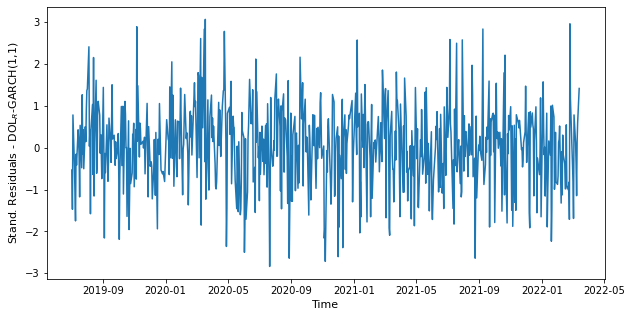

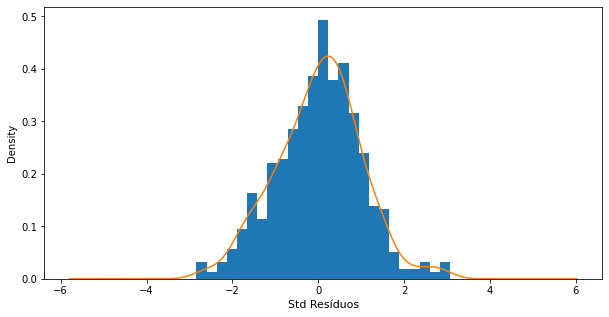

In [37]:
# Std residuals graph and histogram
graph(resultado_dol.std_resid,'Stand. Residuals - DOL${_R}$-GARCH(1,1)')
histogram(resultado_dol.std_resid,'Std Resíduos')

In [38]:
# Estimated CSD DataFrame
dol_csd = pd.DataFrame(resultado_dol.conditional_volatility)
dol_csd

,cond_vol
Date,
2019-07-03,0.741467
2019-07-04,0.730233
2019-07-05,0.776452
2019-07-08,0.773767
2019-07-10,0.758503
...,...
2022-03-08,1.159224
2022-03-09,1.115629
2022-03-10,1.130132


In [39]:
dol_csd.describe()

,cond_vol
count,669.000000
mean,1.040965
std,0.255532
min,0.668002
25%,0.853996
50%,1.008522
75%,1.159224
max,1.954040


In [40]:
# All periods of abnormal volatility, according to the parametric method 
from general import limit_parametric
df_abnormal_vol_parametric_dol = limit_parametric(dol_csd,'cond_vol')
df_abnormal_vol_parametric_dol

Upper Limit Parametric = 1.5520285111804304
Lower Limit Parametric = 0.5299022662807659
cond_vol    42
dtype: int64


,cond_vol
Date,
2020-03-19,1.928286
2020-03-20,1.954040
2020-03-23,1.915118
2020-03-24,1.924760
2020-03-25,1.844323
2020-03-26,1.831581
2020-03-27,1.737669
2020-03-30,1.692046
2020-03-31,1.721910


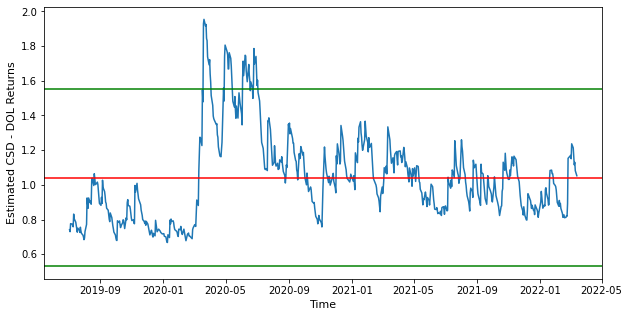

In [41]:
from grafico import csd_parametric
csd_parametric(dol_csd['cond_vol'],'Estimated CSD - DOL Returns')

# E-GARCH

IND E-GARCH

In [42]:
# For both IND Returns and DI1 Returns First Difference an E-GARCH was chosen to capture the asymmetric reactions of volatility to negative and positive events
garch = arch_model(ind_garch, p=1,q=1,o=1, vol='EGARCH', mean='Constant',dist='t')
resultado_ind = garch.fit(disp='off')
resultado_ind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - EGARCH Model Results                        
====================================================================================
Dep. Variable:                        close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -1196.62
Distribution:      Standardized Student's t   AIC:                           2405.24
Method:                  Maximum Likelihood   BIC:                           2432.27
                                              No. Observations:                  669
Date:                      Mon, May 16 2022   Df Residuals:                      668
Time:                              13:45:32   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0652  4.886e-02      1.334      0.182 [-3.061e-02,  0.161]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0315  1.493e-02      2.112  3.469e-02 [2.269e-03,6.077e-02]
alpha[1]       0.2037  5.102e-02      3.992  6.539e-05     [  0.104,  0.304]
gamma[1]      -0.1189  3.005e-02     -3.956  7.633e-05  [ -0.178,-5.997e-02]
beta[1]        0.9590  1.461e-02     65.625      0.000     [  0.930,  0.988]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu            10.7065      3.561      3.006  2.645e-03 [  3.726, 17.687]
========================================================================

Covariance estimator: robust
"""

In [43]:
# Ljung-box test for standardized residuals on lags 6 and 7
lags = log(len(resultado_ind.std_resid))

LjungBox(resultado_ind.std_resid)

resultado_ljungbox = LjungBox(resultado_ind.std_resid).reset_index().rename(columns={'index': 'lags'})
resultado_ljungbox['lags'] = resultado_ljungbox['lags'] + 1
resultado_ljungbox = resultado_ljungbox.set_index('lags')
resultado_ljungbox_lag6 = resultado_ljungbox.iloc[[5]]
resultado_ljungbox_lag7 = resultado_ljungbox.iloc[[6]]
print(resultado_ljungbox_lag6)
print(resultado_ljungbox_lag7)

      lb_stat  lb_pvalue
lags                    
6     7.64767   0.265069
        lb_stat  lb_pvalue
lags                      
7     12.969264   0.072861


In [44]:
# At 5% significance, we failed to reject the null, therefore there's not enough evidence to deny the lack of auto-correlation for those lags

In [45]:
# Ljung-box test for squared standardized residuals on lags 6 and 7
ind_std_res_2 = resultado_ind.std_resid**2
LjungBox(ind_std_res_2)

resultado_ljungbox = LjungBox(ind_std_res_2).reset_index().rename(columns={'index': 'lags'})
resultado_ljungbox['lags'] = resultado_ljungbox['lags'] + 1
resultado_ljungbox = resultado_ljungbox.set_index('lags')
resultado_ljungbox_lag6 = resultado_ljungbox.iloc[[5]]
resultado_ljungbox_lag7 = resultado_ljungbox.iloc[[6]]
print(resultado_ljungbox_lag6)
print(resultado_ljungbox_lag7)

      lb_stat  lb_pvalue
lags                    
6     2.17049    0.90337
       lb_stat  lb_pvalue
lags                     
7     2.368897   0.936642


In [46]:
# At 5% significance, we failed to reject the null, therefore there's not enough evidence to deny the homoskedasticity in the data.

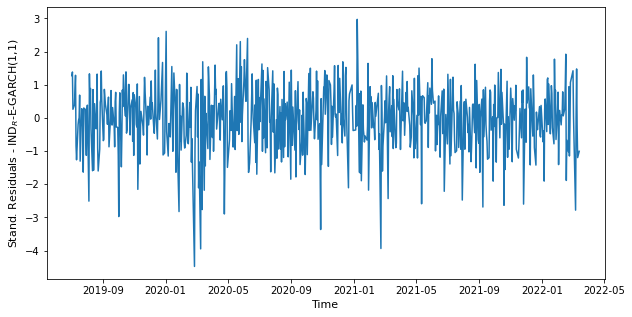

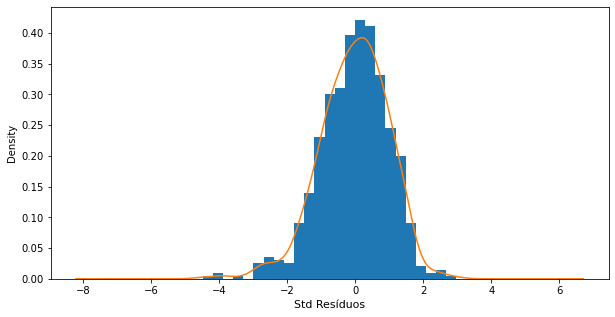

In [47]:
# Std residuals graph and histogram
graph(resultado_ind.std_resid,'Stand. Residuals - IND${_R}$-E-GARCH(1,1)')
histogram(resultado_ind.std_resid,'Std Resíduos')

In [48]:
# Estimated CSD DataFrame
ind_csd = pd.DataFrame(resultado_ind.conditional_volatility)
ind_csd

,cond_vol
Date,
2019-07-03,1.079230
2019-07-04,1.063604
2019-07-05,1.053755
2019-07-08,0.995776
2019-07-10,0.948490
...,...
2022-03-08,1.687090
2022-03-09,1.548187
2022-03-10,1.516304


In [49]:
ind_csd.describe()

,cond_vol
count,669.000000
mean,1.594641
std,0.943861
min,0.747085
25%,1.133006
50%,1.440891
75%,1.694032
max,9.094874


In [50]:
# All periods of abnormal volatility, according to the parametric method 
df_abnormal_vol_parametric_ind = limit_parametric(ind_csd,'cond_vol')
df_abnormal_vol_parametric_ind

Upper Limit Parametric = 3.482364117205467
Lower Limit Parametric = -0.29308117007071965
cond_vol    22
dtype: int64


,cond_vol
Date,
2020-03-10,5.721508
2020-03-11,5.240056
2020-03-12,5.902483
2020-03-13,8.026303
2020-03-16,7.415651
2020-03-17,9.094874
2020-03-18,7.998939
2020-03-19,8.688784
2020-03-20,7.492146


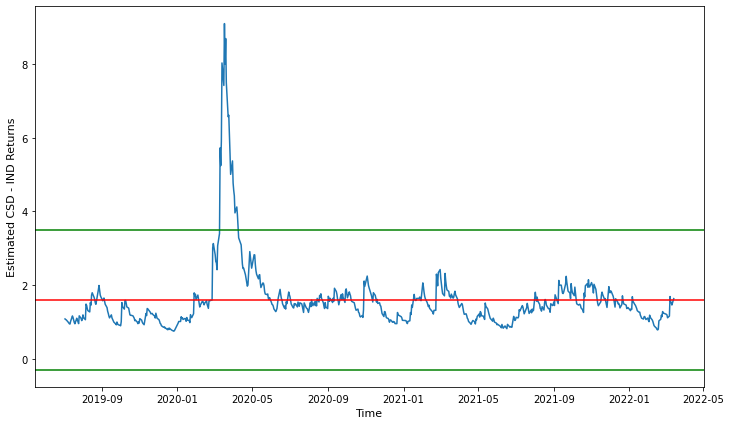

In [51]:
csd_parametric(ind_csd['cond_vol'],'Estimated CSD - IND Returns',a=12,b=7)

DI1 E-GARCH

In [52]:
garch = arch_model(di1_garch, p=2,q=1,o=1, vol='EGARCH', mean='Constant',dist='t')
resultado_di1 = garch.fit(disp='off')
resultado_di1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - EGARCH Model Results                        
====================================================================================
Dep. Variable:                        close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -644.607
Distribution:      Standardized Student's t   AIC:                           1303.21
Method:                  Maximum Likelihood   BIC:                           1334.74
                                              No. Observations:                  668
Date:                      Mon, May 16 2022   Df Residuals:                      667
Time:                              13:45:33   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0136  7.991e-03     -1.708  8.765e-02 [-2.931e-02,2.014e-03]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.4201      0.591      2.402  1.631e-02 [  0.261,  2.579]
alpha[1]       2.8251      0.737      3.835  1.257e-04 [  1.381,  4.269]
alpha[2]      -0.9958      0.264     -3.770  1.634e-04 [ -1.514, -0.478]
gamma[1]      -1.0185      0.315     -3.235  1.214e-03 [ -1.636, -0.402]
beta[1]        0.6703  5.658e-02     11.846  2.244e-32 [  0.559,  0.781]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             2.0500  2.626e-02     78.053      0.000 [  1.999,  2.101]
========================================================================

Covariance estimator: robust
"""

In [53]:
# Ljung-box test for standardized residuals on lags 6 and 7
lags = log(len(resultado_di1.std_resid))
LjungBox(resultado_di1.std_resid)

resultado_ljungbox = LjungBox(resultado_di1.std_resid).reset_index().rename(columns={'index': 'lags'})
resultado_ljungbox['lags'] = resultado_ljungbox['lags']
resultado_ljungbox = resultado_ljungbox.set_index('lags')
resultado_ljungbox_lag6 = resultado_ljungbox.iloc[[5]] 
resultado_ljungbox_lag7 = resultado_ljungbox.iloc[[6]]
print(resultado_ljungbox_lag6)
print(resultado_ljungbox_lag7)

       lb_stat  lb_pvalue
lags                     
5     2.034676   0.916482
       lb_stat  lb_pvalue
lags                     
6     2.067951   0.955984


In [54]:
# At 5% significance, we failed to reject the null, therefore there's not enough evidence to deny the lack of auto-correlation for those lags

In [55]:
# Ljung-box test for squared standardized residuals on lags 6 and 7
di1_std_res_2 = resultado_di1.std_resid**2
LjungBox(di1_std_res_2)

resultado_ljungbox = LjungBox(di1_std_res_2).reset_index().rename(columns={'index': 'lags'})
resultado_ljungbox['lags'] = resultado_ljungbox['lags'] + 1
resultado_ljungbox = resultado_ljungbox.set_index('lags')
resultado_ljungbox_lag6 = resultado_ljungbox.iloc[[5]]
resultado_ljungbox_lag7 = resultado_ljungbox.iloc[[6]]
print(resultado_ljungbox_lag6)
print(resultado_ljungbox_lag7)

       lb_stat  lb_pvalue
lags                     
6     0.821938   0.991473
       lb_stat  lb_pvalue
lags                     
7     0.967382   0.995338


In [56]:
# At 5% significance, we failed to reject the null, therefore there's not enough evidence to deny the homoskedasticity in the data.

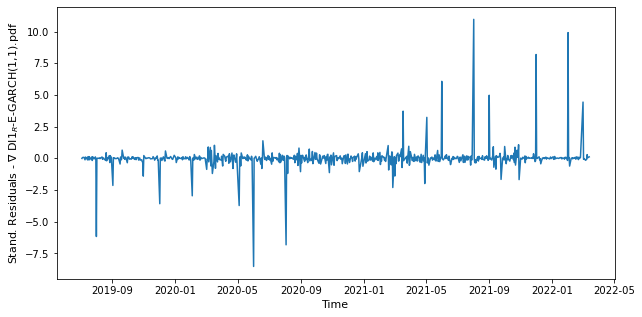

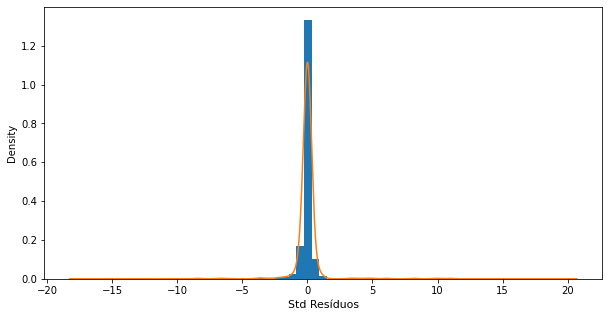

In [57]:
# Std residuals graph and histogram
graph(resultado_di1.std_resid,'Stand. Residuals - 'r'$\nabla$ DI1${_R}$-E-GARCH(1,1).pdf')
histogram(resultado_di1.std_resid,'Std Resíduos',bins=33)

In [58]:
# Estimated CSD DataFrame
di1_csd = pd.DataFrame(resultado_di1.conditional_volatility)
di1_csd

,cond_vol
Date,
2019-07-04,2.743674
2019-07-05,1.326848
2019-07-08,1.240628
2019-07-10,1.177050
2019-07-11,1.330341
...,...
2022-03-08,1.708562
2022-03-09,1.557481
2022-03-10,1.504513


In [59]:
di1_csd.describe()

,cond_vol
count,668.000000
mean,37.526424
std,328.172226
min,0.984230
25%,1.253790
50%,1.577549
75%,2.240529
max,4863.636763


In [60]:
# All periods of abnormal volatility, according to the parametric method 
df_abnormal_vol_parametric_di1 = limit_parametric(di1_csd,'cond_vol')
df_abnormal_vol_parametric_di1

Upper Limit Parametric = 693.8708765738558
Lower Limit Parametric = -618.8180282979657
cond_vol    8
dtype: int64


,cond_vol
Date,
2019-08-02,2137.017016
2019-12-03,1153.399339
2020-05-05,2340.600698
2020-06-02,3702.689105
2020-08-04,2544.423553
2021-08-03,4863.636763
2021-12-02,2112.309130
2022-02-02,3585.159778


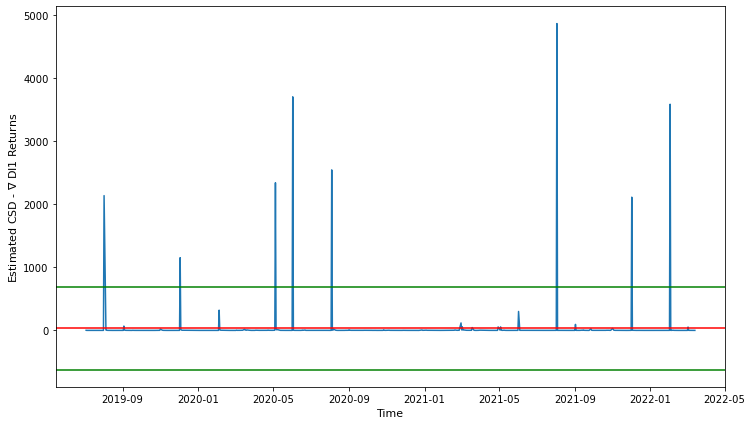

In [61]:
csd_parametric(di1_csd['cond_vol'],'Estimated CSD - 'r'$\nabla$ DI1 Returns',a=12,b=7)

# Notícias

In [62]:
# Load the news DataFrame
df_news = pd.read_csv('noticias.csv').sort_values('Datas',ascending=True)
df_news['Datas'] = pd.to_datetime(df_news['Datas'])
df_news = df_news.set_index('Datas')
df_news

,Headlines,Links
Datas,,
2019-07-02 13:17:12,Inclusão de estados na reforma da Previdência ...,https://g1.globo.com/politica/noticia/2019/07/...
2019-07-02 13:47:22,Defesa de Lula pede afastamento do desembargad...,https://g1.globo.com/rs/rio-grande-do-sul/noti...
2019-07-02 13:55:23,Bolsonaro diz que presos deveriam ser obrigado...,https://g1.globo.com/politica/noticia/2019/07/...
2019-07-02 13:58:14,CPI de Brumadinho propõe indiciamento de 14 fu...,https://g1.globo.com/mg/minas-gerais/noticia/2...
2019-07-02 14:20:02,Bolsonaro diz que governo pretende enviar equi...,https://g1.globo.com/politica/noticia/2019/07/...
...,...,...
2022-03-14 08:22:31,Alvo de críticas após aumento dos combustíveis...,https://g1.globo.com/economia/blog/ana-flor/po...
2022-03-14 08:27:44,"Após alta dos combustíveis, mercado eleva para...",https://g1.globo.com/economia/noticia/2022/03/...
2022-03-14 08:57:06,"Por candidatura única e ampliação de bancadas,...",https://g1.globo.com/politica/blog/andreia-sad...


In [63]:
# Load the news volume DataFrame (count every single news on each day and group by date)
df_news_volume = pd.read_csv('volume_noticias_sem_fim_de_semana.csv').sort_values('Datas',ascending=True)
df_news_volume['Datas'] = pd.to_datetime(df_news_volume['Datas'])
df_news_volume = df_news_volume.set_index('Datas')
df_news_volume

,Volume
Datas,
2019-07-02,17
2019-07-03,30
2019-07-04,20
2019-07-05,21
2019-07-08,27
...,...
2022-03-07,32
2022-03-08,18
2022-03-09,32


           Volume
count  704.000000
mean    24.803977
std     10.060482
min      2.000000
25%     18.000000
50%     25.000000
75%     30.000000
max    117.000000


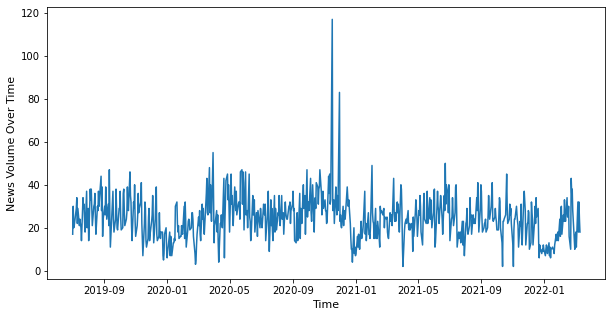

In [64]:
print(df_news_volume.describe())
graph(df_news_volume,"News Volume Over Time")

# Paramétrico

DOL

In [65]:
# News were abnormal volatility is present - DOL
from general import volume_news_volatility, news_volatility
df_news_par_dol = news_volatility(df_abnormal_vol_parametric_dol,df_news)
df_news_par_dol

,Headlines,Links
Datas,,
2020-03-19 00:19:24,"Em nome da Câmara, Rodrigo Maia pede desculpas...",https://g1.globo.com/politica/noticia/2020/03/...
2020-03-19 08:09:18,Bolsonaro é alvo de protestos em 22 capitais; ...,https://g1.globo.com/politica/blog/matheus-lei...
2020-03-19 09:21:25,Conselho recomenda revogação de portaria da Fu...,https://g1.globo.com/politica/blog/matheus-lei...
2020-03-19 10:17:16,Pedido de socorro dos estados de R$ 15 bilhões...,https://g1.globo.com/politica/blog/julia-duail...
2020-03-19 10:40:39,Alcolumbre faz exames em hospital e volta para...,https://g1.globo.com/politica/noticia/2020/03/...
...,...,...
2020-07-02 18:46:02,Coronavírus: Senado aprova MP que autoriza ass...,https://g1.globo.com/politica/noticia/2020/07/...
2020-07-02 18:50:31,Barroso dá 48 horas para governo se manifestar...,https://g1.globo.com/politica/noticia/2020/07/...
2020-07-02 19:12:00,"Em depoimento à Polícia Federal, blogueiro bol...",https://g1.globo.com/politica/noticia/2020/07/...


In [66]:
# Dates of abnormal volatility - Parametric DOL
df_abnormal_vol_parametric_dol.index

DatetimeIndex(['2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-27',
               '2020-04-29', '2020-04-30', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-12', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-19', '2020-06-22', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [67]:
df_news_Volatilidade_par_dol = volume_news_volatility(dol_csd,df_news_volume)
df_news_Volatilidade_par_dol

,Volume
Datas,
2019-07-03,30
2019-07-04,20
2019-07-05,21
2019-07-08,27
2019-07-10,34
...,...
2022-03-07,32
2022-03-08,18
2022-03-09,32


In [68]:
# DataFrame for Granger-Causality Test - DOL
df_granger_par_dol = pd.DataFrame(data=zip(dol_csd['cond_vol'],df_news_Volatilidade_par_dol['Volume']),columns=['cond_vol','Volume'],index=df_news_Volatilidade_par_dol.index)
df_granger_par_dol

,cond_vol,Volume
Datas,,
2019-07-03,0.741467,30
2019-07-04,0.730233,20
2019-07-05,0.776452,21
2019-07-08,0.773767,27
2019-07-10,0.758503,34
...,...,...
2022-03-07,1.213480,32
2022-03-08,1.159224,18
2022-03-09,1.115629,32


IND

In [69]:
# News were abnormal volatility is present - IND
df_news_par_ind = news_volatility(df_abnormal_vol_parametric_ind,df_news)
df_news_par_ind

,Headlines,Links
Datas,,
2020-03-10 05:01:24,Congresso pode votar nesta terça-feira projeto...,https://g1.globo.com/politica/noticia/2020/03/...
2020-03-10 05:01:28,"Sem previsão de acordo, Supremo faz nova reuni...",https://g1.globo.com/economia/noticia/2020/03/...
2020-03-10 08:35:46,Mercado vive pânico com Ibovespa caindo 12%; G...,https://g1.globo.com/politica/blog/matheus-lei...
2020-03-10 10:01:12,Radialista preso na 8ª fase da Operação Calvár...,https://g1.globo.com/politica/blog/matheus-lei...
2020-03-10 11:19:28,"Bolsonaro pode se reunir com Maia, Alcolumbre ...",https://g1.globo.com/politica/blog/valdo-cruz/...
...,...,...
2020-04-08 22:03:00,Tribunal derruba decisão que havia bloqueado d...,https://g1.globo.com/politica/noticia/2020/04/...
2020-04-08 22:12:14,Coronavírus: Governo prevê mais de 40 voos par...,https://g1.globo.com/politica/noticia/2020/04/...
2020-04-08 22:42:28,Governo edita MP para isentar consumidores de ...,https://g1.globo.com/economia/noticia/2020/04/...


In [70]:
# Dates of abnormal volatility - Parametric IND
df_abnormal_vol_parametric_ind.index

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06',
               '2020-04-07', '2020-04-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [71]:
# Dias com volatilidade anormal - IND
df_news_Volatilidade_par_ind = volume_news_volatility(ind_csd,df_news_volume)
df_news_Volatilidade_par_ind

,Volume
Datas,
2019-07-03,30
2019-07-04,20
2019-07-05,21
2019-07-08,27
2019-07-10,34
...,...
2022-03-07,32
2022-03-08,18
2022-03-09,32


In [72]:
# DataFrame for Granger-Causality Test - IND
df_granger_par_ind = pd.DataFrame(data=zip(ind_csd['cond_vol'],df_news_Volatilidade_par_ind['Volume']),columns=['cond_vol','Volume'],index=df_news_Volatilidade_par_ind.index)
df_granger_par_ind

,cond_vol,Volume
Datas,,
2019-07-03,1.079230,30
2019-07-04,1.063604,20
2019-07-05,1.053755,21
2019-07-08,0.995776,27
2019-07-10,0.948490,34
...,...,...
2022-03-07,1.157113,32
2022-03-08,1.687090,18
2022-03-09,1.548187,32


DI1

In [73]:
# News were abnormal volatility is present - DI1
df_news_par_di1 = news_volatility(df_abnormal_vol_parametric_di1,df_news)
df_news_par_di1

,Headlines,Links
Datas,,
2019-08-02 05:58:01,Fux proíbe destruição de mensagens hackeadas; ...,https://g1.globo.com/politica/blog/matheus-lei...
2019-08-02 06:00:15,STJ decidirá no dia 28 se acusados por atentad...,https://g1.globo.com/politica/blog/matheus-lei...
2019-08-02 09:22:16,Bolsonaro diz que não falou 'nada de mais' sob...,https://g1.globo.com/politica/noticia/2019/08/...
2019-08-02 09:39:50,"Em duas decisões, Supremo impõe limite ao gove...",https://g1.globo.com/politica/blog/gerson-cama...
2019-08-02 10:06:09,Maia e Moro se reúnem em Brasília para discuti...,https://g1.globo.com/politica/noticia/2019/08/...
...,...,...
2022-02-02 19:00:26,Convidado por Bolsonaro para ser líder do gove...,https://g1.globo.com/politica/noticia/2022/02/...
2022-02-02 19:45:11,Câmara conclui votação de projeto que pune mot...,https://g1.globo.com/politica/noticia/2022/02/...
2022-02-02 20:02:48,Câmara aprova projeto que prevê dedução de IR ...,https://g1.globo.com/politica/noticia/2022/02/...


In [74]:
# Dates of abnormal volatility - Parametric DI1
df_abnormal_vol_parametric_di1.index

DatetimeIndex(['2019-08-02', '2019-12-03', '2020-05-05', '2020-06-02',
               '2020-08-04', '2021-08-03', '2021-12-02', '2022-02-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [75]:
# Dias com volatilidade anormal - DI1
df_news_Volatilidade_par_di1 = volume_news_volatility(di1_csd,df_news_volume)
df_news_Volatilidade_par_di1

,Volume
Datas,
2019-07-04,20
2019-07-05,21
2019-07-08,27
2019-07-10,34
2019-07-11,22
...,...
2022-03-07,32
2022-03-08,18
2022-03-09,32


In [76]:
# DataFrame for Granger-Causality Test - DI1
df_granger_par_di1 = pd.DataFrame(data=zip(di1_csd['cond_vol'],df_news_Volatilidade_par_di1['Volume']),columns=['cond_vol','Volume'],index=df_news_Volatilidade_par_di1.index)
df_granger_par_di1

,cond_vol,Volume
Datas,,
2019-07-04,2.743674,20
2019-07-05,1.326848,21
2019-07-08,1.240628,27
2019-07-10,1.177050,34
2019-07-11,1.330341,22
...,...,...
2022-03-07,1.470719,32
2022-03-08,1.708562,18
2022-03-09,1.557481,32


# Não Paramétrico

DOL

In [77]:
from general import limit_non_parametric # Percentile >0.95 e <.05 of series returns
df_abnormal_vol_non_parametric_dol = limit_non_parametric(dol,'close',0.95,0.05)
df_abnormal_vol_non_parametric_dol

Upper Limit Non Parametric = 0.016820066477867362 | Lower Limit Non Parametric  = -0.01812871150097699
close    68
dtype: int64


,close
Date,
2019-08-05,0.018920
2019-08-14,0.019452
2019-09-04,-0.018984
2019-11-06,0.022738
2020-03-09,0.023297
...,...
2021-10-25,-0.019210
2021-11-05,-0.019514
2022-01-19,-0.019594


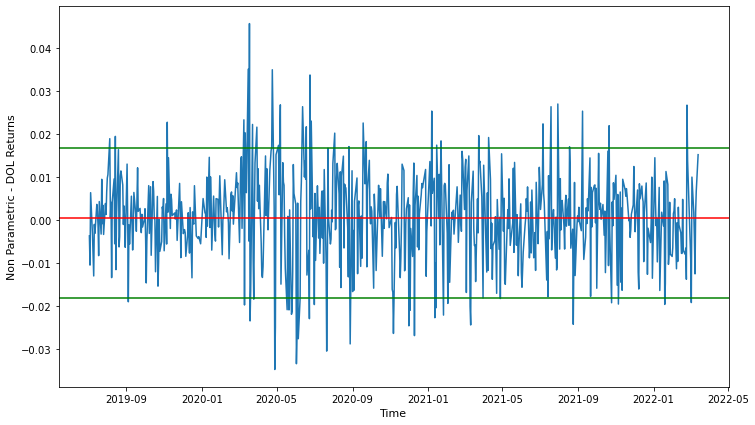

In [78]:
from grafico import csd_non_parametric
csd_non_parametric(dol['close'],'Non Parametric - DOL Returns',a=12,b=7)

In [79]:
# News were abnormal volatility is present - DOL
df_news_non_par_dol = news_volatility(df_abnormal_vol_non_parametric_dol,df_news)
df_news_non_par_dol

,Headlines,Links
Datas,,
2019-08-05 05:30:22,230 deputados faltam a pelo menos 1/4 das vota...,https://g1.globo.com/politica/noticia/2019/08/...
2019-08-05 08:20:14,Bolsonaro: 'botei parentes no passado'; Recome...,https://g1.globo.com/politica/blog/matheus-lei...
2019-08-05 08:36:17,'Direita democrática não deve apoiar ditaduras...,https://g1.globo.com/politica/blog/matheus-lei...
2019-08-05 09:11:33,Secretário diz que retirada de trecho sobre pe...,https://g1.globo.com/politica/blog/gerson-cama...
2019-08-05 12:24:38,PF pretende ultrapassar R$ 1 bi em apreensões ...,https://g1.globo.com/politica/blog/matheus-lei...
...,...,...
2022-03-03 16:58:45,Ucranianos receberão visto de 180 dias e poder...,https://g1.globo.com/mundo/ucrania-russia/noti...
2022-03-03 17:01:26,Ciro diz que governo brasileiro não pode ter '...,https://g1.globo.com/sp/campinas-regiao/eleico...
2022-03-03 17:41:30,Bolsonaro e Boris Johnson se falam por telefon...,https://g1.globo.com/mundo/ucrania-russia/noti...


IND

In [80]:
# Percentile >0.95 e <.05 of series returns
df_abnormal_vol_non_parametric_ind = limit_non_parametric(ind,'close',0.95,0.05)
df_abnormal_vol_non_parametric_ind

Upper Limit Non Parametric = 0.023217422003616765 | Lower Limit Non Parametric  = -0.025460642971657066
close    68
dtype: int64


,close
Date,
2019-08-05,-0.025903
2019-08-29,0.025067
2019-10-02,-0.029305
2020-01-02,0.025796
2020-01-27,-0.033797
...,...
2021-10-21,-0.025487
2021-11-26,-0.035518
2021-12-02,0.034343


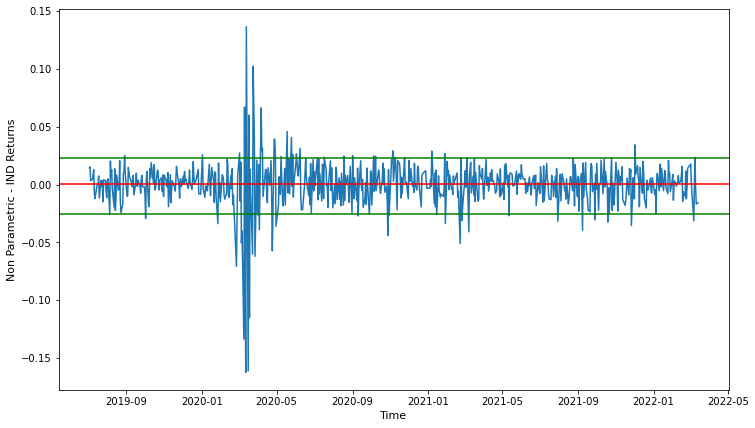

In [81]:
csd_non_parametric(ind['close'],'Non Parametric - IND Returns',a=12,b=7)

In [82]:
# News were abnormal volatility is present - IND
df_news_non_par_ind = news_volatility(df_abnormal_vol_non_parametric_ind,df_news)
df_news_non_par_ind

,Headlines,Links
Datas,,
2019-08-05 05:30:22,230 deputados faltam a pelo menos 1/4 das vota...,https://g1.globo.com/politica/noticia/2019/08/...
2019-08-05 08:20:14,Bolsonaro: 'botei parentes no passado'; Recome...,https://g1.globo.com/politica/blog/matheus-lei...
2019-08-05 08:36:17,'Direita democrática não deve apoiar ditaduras...,https://g1.globo.com/politica/blog/matheus-lei...
2019-08-05 09:11:33,Secretário diz que retirada de trecho sobre pe...,https://g1.globo.com/politica/blog/gerson-cama...
2019-08-05 12:24:38,PF pretende ultrapassar R$ 1 bi em apreensões ...,https://g1.globo.com/politica/blog/matheus-lei...
...,...,...
2022-03-09 21:46:27,Câmara aprova urgência para votação de projeto...,https://g1.globo.com/politica/noticia/2022/03/...
2022-03-09 22:20:06,Bolsonaro edita decreto que regulamenta devolu...,https://g1.globo.com/politica/noticia/2022/03/...
2022-03-09 22:41:49,Senado aprova projeto que cria Sistema Naciona...,https://g1.globo.com/politica/noticia/2022/03/...


DI1

In [83]:
# Percentile >0.95 e <.05 of series returns
df_abnormal_vol_non_parametric_di1 = limit_non_parametric(di1,'close',0.95,0.05)
df_abnormal_vol_non_parametric_di1

Upper Limit Non Parametric = 0.017790356768025588 | Lower Limit Non Parametric  = -0.018559953522811673
close    68
dtype: int64


,close
Date,
2019-08-01,-0.080070
2019-08-02,0.081007
2019-09-02,-0.028346
2019-09-03,0.025749
2019-10-31,-0.032164
...,...
2021-12-02,-0.134383
2022-02-01,0.135279
2022-02-02,-0.125623


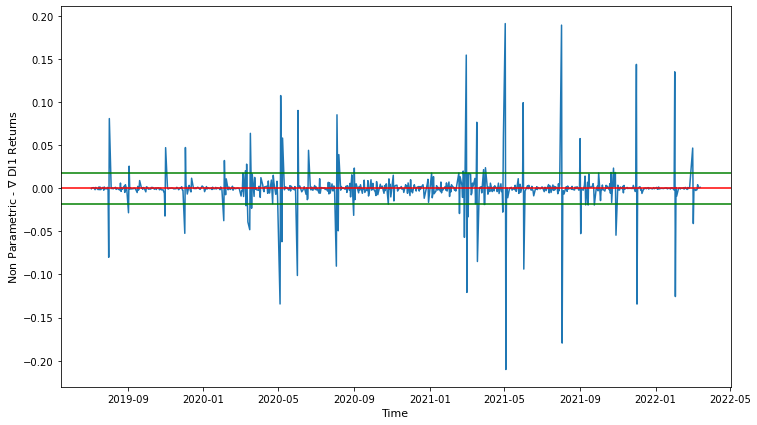

In [84]:
csd_non_parametric(di1['close'],'Non Parametric - 'r'$\nabla$ DI1 Returns',a=12,b=7)

In [85]:
# News were abnormal volatility is present - DI1
df_news_non_par_di1 = news_volatility(df_abnormal_vol_non_parametric_di1,df_news)
df_news_non_par_di1

,Headlines,Links
Datas,,
2019-08-01 05:00:08,Supremo retoma atividades nesta quinta; Coaf e...,https://g1.globo.com/politica/noticia/2019/08/...
2019-08-01 07:17:04,Bolsonaro e Damares trocam integrantes da Comi...,https://g1.globo.com/politica/noticia/2019/08/...
2019-08-01 08:43:27,Bolsonaro diz que trocas na Comissão de Desapa...,https://g1.globo.com/politica/noticia/2019/08/...
2019-08-01 08:47:48,Desemprego e juros caem; Inpe vê nova alta de ...,https://g1.globo.com/politica/blog/matheus-lei...
2019-08-01 08:52:57,"'Sinto pelos familiares', diz presidente desti...",https://g1.globo.com/politica/noticia/2019/08/...
...,...,...
2022-03-03 16:58:45,Ucranianos receberão visto de 180 dias e poder...,https://g1.globo.com/mundo/ucrania-russia/noti...
2022-03-03 17:01:26,Ciro diz que governo brasileiro não pode ter '...,https://g1.globo.com/sp/campinas-regiao/eleico...
2022-03-03 17:41:30,Bolsonaro e Boris Johnson se falam por telefon...,https://g1.globo.com/mundo/ucrania-russia/noti...


# NEWS ANALYSIS - ABNORMAL VOLATILITY

DOL

In [86]:
df_abnormal_vol_parametric_dol.index

DatetimeIndex(['2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-27',
               '2020-04-29', '2020-04-30', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-12', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-19', '2020-06-22', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [87]:
df_abnormal_vol_non_parametric_dol.index

DatetimeIndex(['2019-08-05', '2019-08-14', '2019-09-04', '2019-11-06',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-16',
               '2020-03-18', '2020-03-19', '2020-03-23', '2020-03-25',
               '2020-03-30', '2020-04-23', '2020-04-24', '2020-04-28',
               '2020-04-29', '2020-05-04', '2020-05-06', '2020-05-07',
               '2020-05-18', '2020-05-21', '2020-05-25', '2020-05-26',
               '2020-06-02', '2020-06-03', '2020-06-05', '2020-06-08',
               '2020-06-12', '2020-06-18', '2020-06-23', '2020-06-24',
               '2020-06-26', '2020-07-01', '2020-07-21', '2020-08-03',
               '2020-08-26', '2020-08-28', '2020-09-18', '2020-09-23',
               '2020-11-06', '2020-12-01', '2020-12-03', '2020-12-10',
               '2021-01-07', '2021-01-12', '2021-01-14', '2021-01-15',
               '2021-01-22', '2021-01-26', '2021-02-02', '2021-03-10',
               '2021-03-11', '2021-03-24', '2021-04-09', '2021-04-28',
      

2019-08-05:

- 2019-08-04 05:00:05 Votação em 2º turno da reforma da Previdência abre nesta semana segundo semestre da Câmara

2019-10-02:

- 2019-10-02 15:46:28 STF aprova por 7 votos a 4 tese que pode levar à anulação de sentenças da Operação Lava Jato

2020-02-04 a 2020-04-08:

- 2020-02-04 09:44:31 - Governo vai decretar emergência por coronavírus; empresas já perderam R$ 54 bi em valor de mercado
- 2020-02-26 08:19:14 - Brasil tem primeiro teste positivo de coronavirus;
- 2020-02-27 08:40:36 - Bolsa cai 7% após confirmação do coronavírus no país; governos temem sobrecarga na saúde
- 2020-03-09 08:48:13 - Itália isola 16 milhões de pessoas; 
- 2020-03-12 08:28:12 - OMS declara pandemia por coronavírus; Brasil pode ter aumento rápido de casos
- 2020-03-18 05:00:51  - Copom se reúne nesta quarta, e crise do coronavírus faz mercado prever novo corte dos juros (SÓ NO DÓLAR)
        
2020-04-24 a 2020-05-13:

- 2020-04-24 11:42:31 - Ex-juiz Sergio Moro anuncia demissão do Ministério da Justiça e deixa o governo Bolsonaro
- 2020-04-30 16:21:58 - Ataques de Bolsonaro a Alexandre de Moraes são criticados no governo e no STF
- 2020-05-03 11:28:49 - Bolsonaro volta a apoiar ato antidemocrático e diz que não vai mais 'admitir interferência'

2020-06-02 a 2020-07-06:

- 2020-06-17 18:06:35 Copom faz novo corte, e juro básico cai para 2,25% ao ano
- 2020-07-06 08:56:21 Mercado melhora projeção para o PIB e vê queda de 6,5% em 2020

2020-10-28 a 2020-11-24:

- Eleições municipais de 2020

2021-01-27 a 2021-02-02:

- 2021-01-27 16:06:09 - Partidos de oposição protocolam na Câmara mais um pedido de impeachment de Bolsonaro
- 2021-02-01 05:01:28 - Eleição na Câmara: conheça o perfil dos candidatos que disputam a presidência

2021-03-08 a 2021-03-10:

- 2021-03-08 15:37:08 - Fachin anula condenações de Lula relacionadas à Lava Jato; ex-presidente volta a ser elegível

2021-09-07 a 2021-09-09:

- 2021-09-07 11:35:06 - Bolsonaro faz ameaça golpista ao Supremo em discurso para apoiadores em Brasília

2021-10-26 a 2021-11-01:

- 2021-10-26 13:24:40 - Contrato cancelado, apurações da PF e ação contra Bolsonaro: relator lista desdobramentos da CPI

2022-03-03:

- 2022-03-03 15:00:40 Balança comercial tem superávit de US$ 4,04 bilhões no melhor mês de fevereiro em cinco anos

IND

In [88]:
df_abnormal_vol_parametric_ind.index

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06',
               '2020-04-07', '2020-04-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [89]:
df_abnormal_vol_non_parametric_ind.index

DatetimeIndex(['2019-08-05', '2019-08-29', '2019-10-02', '2020-01-02',
               '2020-01-27', '2020-02-26', '2020-02-27', '2020-03-02',
               '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-04-01',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-08', '2020-05-18', '2020-05-25',
               '2020-05-27', '2020-06-02', '2020-06-08', '2020-07-06',
               '2020-07-17', '2020-08-18', '2020-09-01', '2020-09-10',
               '2020-10-05', '2020-10-08', '2020-10-28', '2020-10-30',
               '2020-11-05', '2020-11-09', '2020-11-24', '2021-01-07',
               '2021-01-15', '2021-01-28', '2021-01-29', '2021-02-22',
      

2019-08-05:

- 2019-08-04 05:00:05 Votação em 2º turno da reforma da Previdência abre nesta semana segundo semestre da Câmara

2019-10-02:

- 2019-10-02 15:46:28 STF aprova por 7 votos a 4 tese que pode levar à anulação de sentenças da Operação Lava Jato

2020-02-04 a 2020-04-08:

- 2020-02-04 09:44:31 - Governo vai decretar emergência por coronavírus; empresas já perderam R$ 54 bi em valor de mercado
- 2020-02-26 08:19:14 - Brasil tem primeiro teste positivo de coronavirus;
- 2020-02-27 08:40:36 - Bolsa cai 7% após confirmação do coronavírus no país; governos temem sobrecarga na saúde
- 2020-03-09 08:48:13 - Itália isola 16 milhões de pessoas; 
- 2020-03-12 08:28:12 - OMS declara pandemia por coronavírus; Brasil pode ter aumento rápido de casos
- 2020-03-18 05:00:51  - Copom se reúne nesta quarta, e crise do coronavírus faz mercado prever novo corte dos juros (SÓ NO DÓLAR)
        
2020-04-24 a 2020-05-13):

- 2020-04-24 11:42:31 - Ex-juiz Sergio Moro anuncia demissão do Ministério da Justiça e deixa o governo Bolsonaro
- 2020-04-30 16:21:58 - Ataques de Bolsonaro a Alexandre de Moraes são criticados no governo e no STF
- 2020-05-03 11:28:49 - Bolsonaro volta a apoiar ato antidemocrático e diz que não vai mais 'admitir interferência'

2020-10-28 a 2020-11-24:

- Eleições municipais de 2020

2021-01-27 a 2021-02-02:

- 2021-01-27 16:06:09 - Partidos de oposição protocolam na Câmara mais um pedido de impeachment de Bolsonaro
- 2021-02-01 05:01:28 - Eleição na Câmara: conheça o perfil dos candidatos que disputam a presidência

2021-02-19:

- 2021-02-19 19:19:23 - Bolsonaro anuncia indicação de general Joaquim Silva e Luna para assumir presidência da Petrobras

2021-03-08 a 2021-03-10:

- 2021-03-08 15:37:08 - Fachin anula condenações de Lula relacionadas à Lava Jato; ex-presidente volta a ser elegível

2021-05-12:

- 2021-05-12 18:20:19 Lula tem 41%; Bolsonaro, 23%; Moro, 7%; e Ciro, 6% no 1º turno, aponta pesquisa Datafolha para a eleição de 2022
- 2021-05-12: Depoimento de Wajngarten na CPI da COVID

2021-09-07 a 2021-09-09:

- 2021-09-07 11:35:06 - Bolsonaro faz ameaça golpista ao Supremo em discurso para apoiadores em Brasília

2022-03-03:

2022-03-03 15:00:40 Balança comercial tem superávit de US$ 4,04 bilhões no melhor mês de fevereiro em cinco anos

2022-03-07:

- 2022-03-07 08:35:30 Mercado financeiro eleva para 5,65% estimativa de inflação em 2022 e vê alta maior do PIB
- 2022-03-07 12:08:45 Alckmin se encontra com Siqueira e acerta filiação com PSB para ser vice de Lula

DI1

In [90]:
df_abnormal_vol_parametric_di1.index

DatetimeIndex(['2019-08-02', '2019-12-03', '2020-05-05', '2020-06-02',
               '2020-08-04', '2021-08-03', '2021-12-02', '2022-02-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [91]:
df_abnormal_vol_non_parametric_di1.index

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-09-02', '2019-09-03',
               '2019-10-31', '2019-11-01', '2019-12-02', '2019-12-03',
               '2020-02-03', '2020-02-04', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-06-01',
               '2020-06-02', '2020-06-19', '2020-08-03', '2020-08-04',
               '2020-08-06', '2020-08-07', '2020-08-31', '2020-09-01',
               '2021-01-04', '2021-02-18', '2021-02-24', '2021-02-26',
               '2021-03-01', '2021-03-02', '2021-03-04', '2021-03-18',
               '2021-03-19', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-06-01', '2021-06-02', '2021-08-02',
               '2021-08-03', '2021-09-01', '2021-09-02', '2021-09-10',
      

2020-02-04 a 2020-04-08:

- 2020-02-04 09:44:31 - Governo vai decretar emergência por coronavírus; empresas já perderam R$ 54 bi em valor de mercado
- 2020-02-26 08:19:14 - Brasil tem primeiro teste positivo de coronavirus;
- 2020-02-27 08:40:36 - Bolsa cai 7% após confirmação do coronavírus no país; governos temem sobrecarga na saúde
- 2020-03-09 08:48:13 - Itália isola 16 milhões de pessoas; 
- 2020-03-12 08:28:12 - OMS declara pandemia por coronavírus; Brasil pode ter aumento rápido de casos
- 2020-03-18 05:00:51  - Copom se reúne nesta quarta, e crise do coronavírus faz mercado prever novo corte dos juros (SÓ NO DÓLAR)
        
2020-04-24 a 2020-05-13:

- 2020-04-24 11:42:31 - Ex-juiz Sergio Moro anuncia demissão do Ministério da Justiça e deixa o governo Bolsonaro
- 2020-04-30 16:21:58 - Ataques de Bolsonaro a Alexandre de Moraes são criticados no governo e no STF
- 2020-05-03 11:28:49 - Bolsonaro volta a apoiar ato antidemocrático e diz que não vai mais 'admitir interferência'

2021-09-07 a 2021-09-09:

- 2021-09-07 11:35:06 - Bolsonaro faz ameaça golpista ao Supremo em discurso para apoiadores em Brasília

2021-10-26 a 2021-11-01:

- 2021-10-26 13:24:40 - Contrato cancelado, apurações da PF e ação contra Bolsonaro: relator lista desdobramentos da CPI

2022-03-03:

- 2022-03-03 15:00:40 Balança comercial tem superávit de US$ 4,04 bilhões no melhor mês de fevereiro em cinco anos

# GRANGER CAUSALITY TEST

DOL

In [92]:
df_granger_par_dol

,cond_vol,Volume
Datas,,
2019-07-03,0.741467,30
2019-07-04,0.730233,20
2019-07-05,0.776452,21
2019-07-08,0.773767,27
2019-07-10,0.758503,34
...,...,...
2022-03-07,1.213480,32
2022-03-08,1.159224,18
2022-03-09,1.115629,32


In [93]:
# Check for stationarity
print(dickey_fuller(df_granger_par_dol['cond_vol'].values,'abnormal adf'))
print(dickey_fuller(df_granger_par_dol['Volume'].values,'volume adf'))
print(kpss_test(df_granger_par_dol['Volume'].values,'volume kpss'))
print(kpss_test(df_granger_par_dol['cond_vol'].values,'abnormal kpss'))

abnormal adf
Estatística ADF: -3.556818
p-valor: 0.006642
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


None
volume adf
Estatística ADF: -4.125117
p-valor: 0.000880
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


None
volume kpss
Estatística KPSS: 0.285777
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária


None
abnormal kpss
Estatística KPSS: 0.338722
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária


None


In [94]:
# We don't have enough evidence to deny stationarity for all series

In [95]:
# Lag 63 was chosen, so that we could get 3 months in working days (21 working days per month)
from statsmodels.tsa.stattools import grangercausalitytests
granger_par_dol = grangercausalitytests(df_granger_par_dol,63)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4486  , p=0.5032  , df_denom=664, df_num=1
ssr based chi2 test:   chi2=0.4506  , p=0.5020  , df=1
likelihood ratio test: chi2=0.4505  , p=0.5021  , df=1
parameter F test:         F=0.4486  , p=0.5032  , df_denom=664, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5950  , p=0.2037  , df_denom=661, df_num=2
ssr based chi2 test:   chi2=3.2142  , p=0.2005  , df=2
likelihood ratio test: chi2=3.2065  , p=0.2012  , df=2
parameter F test:         F=1.5950  , p=0.2037  , df_denom=661, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4141  , p=0.2375  , df_denom=658, df_num=3
ssr based chi2 test:   chi2=4.2874  , p=0.2321  , df=3
likelihood ratio test: chi2=4.2736  , p=0.2334  , df=3
parameter F test:         F=1.4141  , p=0.2375  , df_denom=658, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0578  , p=0.3765  

ssr based chi2 test:   chi2=36.7349 , p=0.5279  , df=38
likelihood ratio test: chi2=35.7038 , p=0.5761  , df=38
parameter F test:         F=0.8486  , p=0.7277  , df_denom=553, df_num=38

Granger Causality
number of lags (no zero) 39
ssr based F test:         F=0.8475  , p=0.7325  , df_denom=550, df_num=39
ssr based chi2 test:   chi2=37.7985 , p=0.5246  , df=39
likelihood ratio test: chi2=36.7063 , p=0.5750  , df=39
parameter F test:         F=0.8475  , p=0.7325  , df_denom=550, df_num=39

Granger Causality
number of lags (no zero) 40
ssr based F test:         F=0.8373  , p=0.7516  , df_denom=547, df_num=40
ssr based chi2 test:   chi2=38.4493 , p=0.5401  , df=40
likelihood ratio test: chi2=37.3182 , p=0.5916  , df=40
parameter F test:         F=0.8373  , p=0.7516  , df_denom=547, df_num=40

Granger Causality
number of lags (no zero) 41
ssr based F test:         F=0.7982  , p=0.8121  , df_denom=544, df_num=41
ssr based chi2 test:   chi2=37.7176 , p=0.6173  , df=41
likelihood ratio test: 

In [96]:
# No significant lags

In [97]:
granger_par_dol_df = pd.DataFrame(data={'Lags':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
                                                30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,
                                                56,57,58,59,60,61,62,63],                                        
                                        'p-value': [0.5032,0.2037,0.2375,0.3765,0.4677,0.5925,0.2802,0.2644,0.3311,0.3206,
                                                    0.4147,0.3137,0.3800,0.4581,0.5064,0.5263,0.4258,0.4418,0.3847,0.4350,
                                                    0.4940,0.4809,0.5960,0.6227,0.6084,0.6142,0.6710,0.6846,0.7164,0.7619,
                                                    0.7438,0.5818,0.6334,0.6747,0.7150,0.7579,0.7053,0.7277,0.7325,0.7516,
                                                    0.8121,0.8454,0.7071,0.7172,0.6203,0.6024,0.6338,0.6060,0.6182,0.6513,
                                                    0.6768,0.6960,0.6880,0.7140,0.7736,0.8169,0.7795,0.7779,0.8035,0.7959,
                                                    0.8339,0.8485,0.8510]})
granger_par_dol_df = granger_par_dol_df.set_index('Lags')

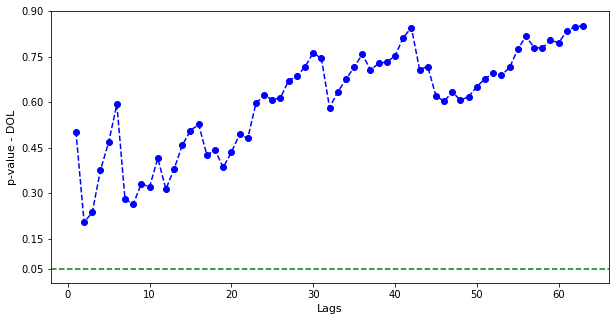

In [98]:
from grafico import graph_pvalue
graph_pvalue(granger_par_dol_df,'p-value - DOL')

IND

In [99]:
df_granger_par_ind

,cond_vol,Volume
Datas,,
2019-07-03,1.079230,30
2019-07-04,1.063604,20
2019-07-05,1.053755,21
2019-07-08,0.995776,27
2019-07-10,0.948490,34
...,...,...
2022-03-07,1.157113,32
2022-03-08,1.687090,18
2022-03-09,1.548187,32


In [100]:
# Check for stationarity
print(dickey_fuller(df_granger_par_ind['cond_vol'].values,'abnormal adf'))
print(dickey_fuller(df_granger_par_ind['Volume'].values,'volume adf'))
print(kpss_test(df_granger_par_ind['Volume'].values,'volume kpss'))
print(kpss_test(df_granger_par_ind['cond_vol'].values,'abnormal kpss'))

abnormal adf
Estatística ADF: -4.220093
p-valor: 0.000609
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


None
volume adf
Estatística ADF: -4.125117
p-valor: 0.000880
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


None
volume kpss
Estatística KPSS: 0.285777
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária


None
abnormal kpss
Estatística KPSS: 0.193238
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária


None


In [101]:
# We don't have enough evidence to deny stationarity for all series

In [102]:
granger_par_ind = grangercausalitytests(df_granger_par_ind,63)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0197  , p=0.8885  , df_denom=664, df_num=1
ssr based chi2 test:   chi2=0.0197  , p=0.8882  , df=1
likelihood ratio test: chi2=0.0197  , p=0.8882  , df=1
parameter F test:         F=0.0197  , p=0.8885  , df_denom=664, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6892  , p=0.1855  , df_denom=661, df_num=2
ssr based chi2 test:   chi2=3.4039  , p=0.1823  , df=2
likelihood ratio test: chi2=3.3952  , p=0.1831  , df=2
parameter F test:         F=1.6892  , p=0.1855  , df_denom=661, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8612  , p=0.4609  , df_denom=658, df_num=3
ssr based chi2 test:   chi2=2.6109  , p=0.4556  , df=3
likelihood ratio test: chi2=2.6058  , p=0.4565  , df=3
parameter F test:         F=0.8612  , p=0.4609  , df_denom=658, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9013  , p=0.4627  

likelihood ratio test: chi2=41.3361 , p=0.0500  , df=28
parameter F test:         F=1.3892  , p=0.0895  , df_denom=583, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.3909  , p=0.0857  , df_denom=580, df_num=29
ssr based chi2 test:   chi2=44.4393 , p=0.0333  , df=29
likelihood ratio test: chi2=42.9621 , p=0.0459  , df=29
parameter F test:         F=1.3909  , p=0.0857  , df_denom=580, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.3530  , p=0.1016  , df_denom=577, df_num=30
ssr based chi2 test:   chi2=44.8822 , p=0.0396  , df=30
likelihood ratio test: chi2=43.3739 , p=0.0543  , df=30
parameter F test:         F=1.3530  , p=0.1016  , df_denom=577, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=1.3026  , p=0.1290  , df_denom=574, df_num=31
ssr based chi2 test:   chi2=44.8136 , p=0.0518  , df=31
likelihood ratio test: chi2=43.3075 , p=0.0699  , df=31
parameter F test:      

likelihood ratio test: chi2=72.9255 , p=0.0638  , df=56
parameter F test:         F=1.1276  , p=0.2532  , df_denom=499, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=1.1009  , p=0.2932  , df_denom=496, df_num=57
ssr based chi2 test:   chi2=77.3040 , p=0.0380  , df=57
likelihood ratio test: chi2=72.7906 , p=0.0775  , df=57
parameter F test:         F=1.1009  , p=0.2932  , df_denom=496, df_num=57

Granger Causality
number of lags (no zero) 58
ssr based F test:         F=1.1946  , p=0.1642  , df_denom=493, df_num=58
ssr based chi2 test:   chi2=85.7276 , p=0.0104  , df=58
likelihood ratio test: chi2=80.2146 , p=0.0283  , df=58
parameter F test:         F=1.1946  , p=0.1642  , df_denom=493, df_num=58

Granger Causality
number of lags (no zero) 59
ssr based F test:         F=1.1713  , p=0.1900  , df_denom=490, df_num=59
ssr based chi2 test:   chi2=85.8901 , p=0.0127  , df=59
likelihood ratio test: chi2=80.3486 , p=0.0338  , df=59
parameter F test:      

In [103]:
# No significant lags

In [104]:
granger_par_ind_df = pd.DataFrame(data={'Lags':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
                                                30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,
                                                56,57,58,59,60,61,62,63],                                        
                                        'p-value': [0.8885,0.1855,0.4609,0.4627,0.5760,0.7144,0.5427,0.5561,0.4508,0.2556,
                                                    0.2803,0.3138,0.3746,0.3675,0.4321,0.4518,0.4025,0.4528,0.4766,0.4921,
                                                    0.5319,0.6023,0.6557,0.6019,0.5245,0.5063,0.4322,0.0895,0.0857,0.1016,
                                                    0.1290,0.1177,0.1630,0.2578,0.3212,0.3257,0.3477,0.3759,0.3779,0.3329,
                                                    0.3363,0.2945,0.2525,0.2797,0.3012,0.3433,0.3745,0.4266,0.4383,0.2737,
                                                    0.2750,0.2556,0.3142,0.2346,0.2006,0.2532,0.2932,0.1642,0.1900,0.1942,
                                                    0.2104,0.2477,0.2786]})

granger_par_ind_df = granger_par_ind_df.set_index('Lags')

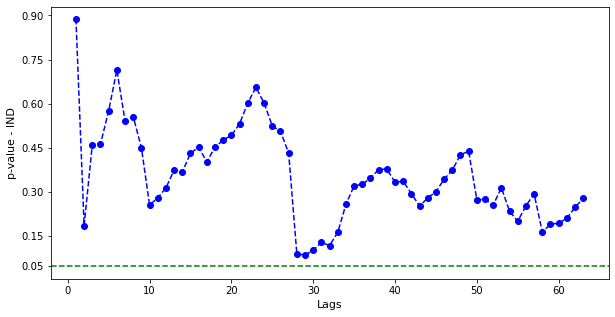

In [105]:
graph_pvalue(granger_par_ind_df,'p-value - IND')

DI1

In [106]:
df_granger_par_di1

,cond_vol,Volume
Datas,,
2019-07-04,2.743674,20
2019-07-05,1.326848,21
2019-07-08,1.240628,27
2019-07-10,1.177050,34
2019-07-11,1.330341,22
...,...,...
2022-03-07,1.470719,32
2022-03-08,1.708562,18
2022-03-09,1.557481,32


In [107]:
# Check for stationarity
print(dickey_fuller(df_granger_par_di1['cond_vol'].values,'abnormal adf'))
print(dickey_fuller(df_granger_par_di1['Volume'].values,'volume adf'))
print(kpss_test(df_granger_par_di1['Volume'].values,'volume kpss'))
print(kpss_test(df_granger_par_di1['cond_vol'].values,'abnormal kpss'))

abnormal adf
Estatística ADF: -26.035525
p-valor: 0.000000
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


None
volume adf
Estatística ADF: -4.124301
p-valor: 0.000883
Valores Críticos:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Resultado: A série é estacionária


None
volume kpss
Estatística KPSS: 0.284074
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária


None
abnormal kpss
Estatística KPSS: 0.080439
p-valor: 0.100000
Nº de lags: 20.000000
Valores Críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Resultado: A série é estacionária


None


In [108]:
# We don't have enough evidence to deny stationarity for all series

In [109]:
granger_par_di1 = grangercausalitytests(df_granger_par_di1,63)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2035  , p=0.2730  , df_denom=663, df_num=1
ssr based chi2 test:   chi2=1.2090  , p=0.2715  , df=1
likelihood ratio test: chi2=1.2079  , p=0.2718  , df=1
parameter F test:         F=1.2035  , p=0.2730  , df_denom=663, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9208  , p=0.0546  , df_denom=660, df_num=2
ssr based chi2 test:   chi2=5.8859  , p=0.0527  , df=2
likelihood ratio test: chi2=5.8600  , p=0.0534  , df=2
parameter F test:         F=2.9208  , p=0.0546  , df_denom=660, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9329  , p=0.1229  , df_denom=657, df_num=3
ssr based chi2 test:   chi2=5.8605  , p=0.1186  , df=3
likelihood ratio test: chi2=5.8348  , p=0.1199  , df=3
parameter F test:         F=1.9329  , p=0.1229  , df_denom=657, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6991  , p=0.1485  

ssr based chi2 test:   chi2=32.7470 , p=0.2452  , df=28
likelihood ratio test: chi2=31.9355 , p=0.2771  , df=28
parameter F test:         F=1.0652  , p=0.3762  , df_denom=582, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.0577  , p=0.3855  , df_denom=579, df_num=29
ssr based chi2 test:   chi2=33.7984 , p=0.2467  , df=29
likelihood ratio test: chi2=32.9336 , p=0.2804  , df=29
parameter F test:         F=1.0577  , p=0.3855  , df_denom=579, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.0500  , p=0.3956  , df_denom=576, df_num=30
ssr based chi2 test:   chi2=34.8352 , p=0.2487  , df=30
likelihood ratio test: chi2=33.9160 , p=0.2842  , df=30
parameter F test:         F=1.0500  , p=0.3956  , df_denom=576, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=1.0134  , p=0.4487  , df_denom=573, df_num=31
ssr based chi2 test:   chi2=34.8681 , p=0.2891  , df=31
likelihood ratio test: 

likelihood ratio test: chi2=67.0922 , p=0.1935  , df=58
parameter F test:         F=0.9879  , p=0.5039  , df_denom=492, df_num=58

Granger Causality
number of lags (no zero) 59
ssr based F test:         F=0.9862  , p=0.5081  , df_denom=489, df_num=59
ssr based chi2 test:   chi2=72.3431 , p=0.1138  , df=59
likelihood ratio test: chi2=68.3528 , p=0.1894  , df=59
parameter F test:         F=0.9862  , p=0.5081  , df_denom=489, df_num=59

Granger Causality
number of lags (no zero) 60
ssr based F test:         F=0.9822  , p=0.5168  , df_denom=486, df_num=60
ssr based chi2 test:   chi2=73.6044 , p=0.1115  , df=60
likelihood ratio test: chi2=69.4726 , p=0.1886  , df=60
parameter F test:         F=0.9822  , p=0.5168  , df_denom=486, df_num=60

Granger Causality
number of lags (no zero) 61
ssr based F test:         F=0.9676  , p=0.5480  , df_denom=483, df_num=61
ssr based chi2 test:   chi2=74.0543 , p=0.1218  , df=61
likelihood ratio test: chi2=69.8673 , p=0.2042  , df=61
parameter F test:      

In [110]:
# No significant lags

In [111]:
granger_par_di1_df = pd.DataFrame(data={'Lags':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
                                                30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,
                                                56,57,58,59,60,61,62,63],                                        
                                        'p-value': [0.2730,0.0546,0.1229,0.1485,0.1675,0.1883,0.2698,0.2225,0.2731,0.1652,
                                                    0.1781,0.1200,0.1470,0.1785,0.1610,0.2052,0.2530,0.3123,0.3434,0.4346,
                                                    0.5612,0.4725,0.2449,0.2817,0.2777,0.3069,0.3536,0.3762,0.3855,0.3956,
                                                    0.4487,0.4718,0.4860,0.5278,0.4901,0.5235,0.5611,0.5773,0.5843,0.6346,
                                                    0.3713,0.3137,0.2677,0.3713,0.4178,0.4365,0.4731,0.4323,0.3538,0.3433,
                                                    0.3667,0.4062,0.4394,0.4557,0.4398,0.4697,0.5032,0.5039,0.5081,0.5168,
                                                    0.5480,0.5752,0.6243]})
granger_par_di1_df = granger_par_di1_df.set_index('Lags')

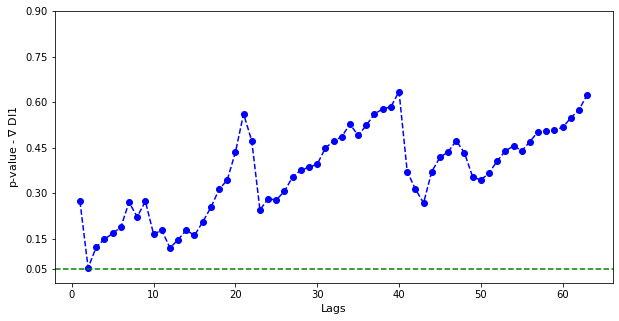

In [112]:
graph_pvalue(granger_par_di1_df,'p-value - 'r'$\nabla$ DI1')